<h2>Predicting if a song is popular from its features</h2>

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [3]:
data = pd.read_csv("datasets/data_prediction.csv")
data.head()

,popularity,energy,tempo,danceability,loudness,liveness,valence,instrumentalness,duration_ms,acousticness,age,speechiness,key_0.0,key_1.0,key_2.0,key_3.0,key_4.0,key_5.0,key_6.0,key_7.0,key_8.0,key_9.0,key_10.0,key_11.0,timesign_1.0,timesign_3.0,timesign_4.0,timesign_5.0
0,1,0.050423,1.377691,-0.557406,0.212275,-0.367816,0.247547,-0.594000,0.685105,-0.139181,-0.75704,-0.719873,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,1,-0.292788,-0.464989,0.641843,-0.113432,-0.408422,-0.129571,-0.425787,0.143782,-0.468509,-0.75704,-0.667148,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0.922583,-0.340848,-0.382294,0.703150,-0.067331,-0.386166,-0.594000,-0.433956,-0.425818,-0.75704,-0.657384,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,1.334437,-0.187219,0.233249,0.716619,1.110247,1.223388,-0.594000,-0.552197,-0.792042,-0.75704,-0.397665,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,0.821639,1.066747,0.801035,0.661246,1.524430,1.818224,-0.594000,-0.386542,-0.992078,-0.75704,1.521912,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [4]:
data['popularity'].value_counts()

popularity
0    2993
1    1318
Name: count, dtype: int64

the data is imbalanced

separating features from target variable

In [5]:
X = data.drop(columns=['popularity'])
y = data['popularity']

function for plotting confusion matrix

In [6]:
def plot_confusion_matrix(y,y_predict):
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt='g')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['not popular', 'popular'])
    ax.yaxis.set_ticklabels(['not popular', 'popular']) 
    plt.show() 

splitting data (15% testing)

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.15, random_state=42)

using SMOTE (Synthetic Minority Over-sampling Technique) to balance the imbalanced data to be used for training

In [8]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

basic Logistic Regression

0.6754250386398764
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       434
           1       0.51      0.59      0.55       213

    accuracy                           0.68       647
   macro avg       0.64      0.65      0.65       647
weighted avg       0.69      0.68      0.68       647



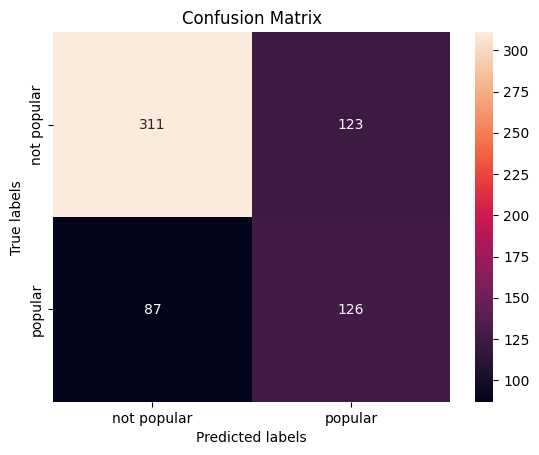

In [9]:
model = LogisticRegression()
model.fit(X_train, Y_train)

print(model.score(X_test, Y_test))

pred = model.predict(X_test)
print(classification_report(Y_test, pred))
plot_confusion_matrix(Y_test, pred)

basic Decision Tree Classifier

0.6816074188562596
              precision    recall  f1-score   support

           0       0.78      0.73      0.75       434
           1       0.51      0.59      0.55       213

    accuracy                           0.68       647
   macro avg       0.65      0.66      0.65       647
weighted avg       0.69      0.68      0.69       647



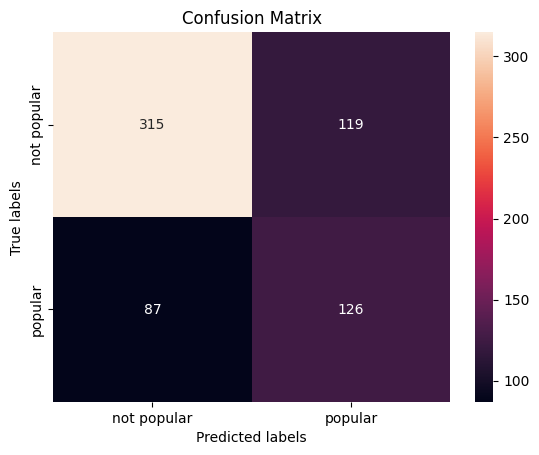

In [10]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

print(model.score(X_test, Y_test))

pred = model.predict(X_test)
print(classification_report(Y_test, pred))
plot_confusion_matrix(Y_test, pred)

basic K Nearest Neighbours

0.6213292117465224
              precision    recall  f1-score   support

           0       0.81      0.57      0.67       434
           1       0.45      0.72      0.56       213

    accuracy                           0.62       647
   macro avg       0.63      0.65      0.61       647
weighted avg       0.69      0.62      0.63       647



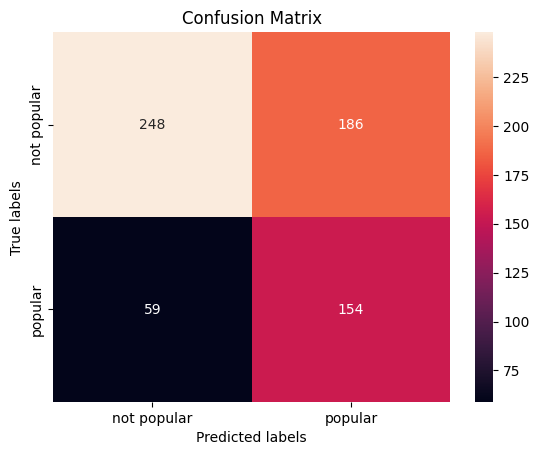

In [11]:
model = KNeighborsClassifier()
model.fit(X_train, Y_train)

print(model.score(X_test, Y_test))

pred = model.predict(X_test)
print(classification_report(Y_test, pred))
plot_confusion_matrix(Y_test, pred)

basic Support Vector Machine

0.6738794435857806
              precision    recall  f1-score   support

           0       0.79      0.70      0.74       434
           1       0.50      0.62      0.56       213

    accuracy                           0.67       647
   macro avg       0.65      0.66      0.65       647
weighted avg       0.70      0.67      0.68       647



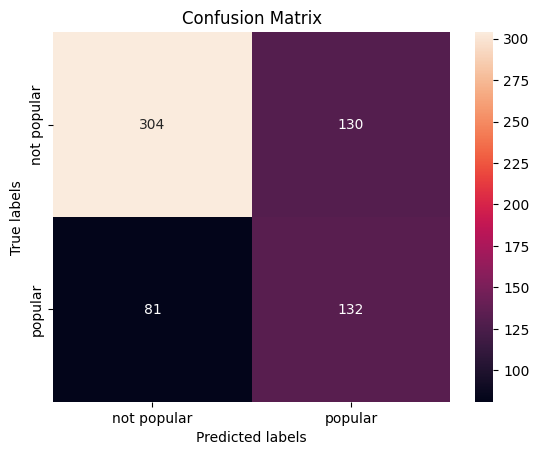

In [12]:
model = SVC()
model.fit(X_train, Y_train)

print(model.score(X_test, Y_test))

pred = model.predict(X_test)
print(classification_report(Y_test, pred))
plot_confusion_matrix(Y_test, pred)

basic Random Forest Classifier

0.7527047913446677
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       434
           1       0.63      0.62      0.62       213

    accuracy                           0.75       647
   macro avg       0.72      0.72      0.72       647
weighted avg       0.75      0.75      0.75       647



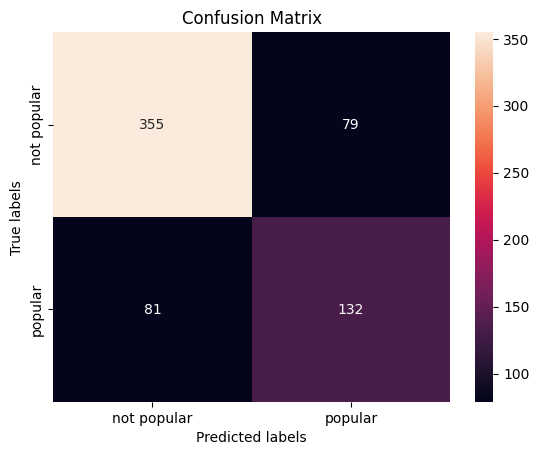

In [13]:
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, Y_train)

print(model.score(X_test, Y_test))

pred = model.predict(X_test)
print(classification_report(Y_test, pred))
plot_confusion_matrix(Y_test, pred)

Random Forest Classifier show the highest accuracy

function for finding the best parameters for a model

In [14]:
def best_estimator(model, params):
    cv = GridSearchCV(
        estimator=model,
        param_grid=params,
        cv=10,
        scoring='f1'
    ).fit(X_train, Y_train)

    print(f'best parameters : {cv.best_params_}')
    print(f'accuracy : {cv.best_score_}')

    print(f'prediction accuracy : {cv.best_estimator_.score(X_test, Y_test)}')

    y_pred = cv.best_estimator_.predict(X_test)
    print("classification report:")
    print(classification_report(Y_test, y_pred))
    plot_confusion_matrix(Y_test, y_pred)

finding best parameters for Random Forest Classifier

In [15]:
rf = RandomForestClassifier(class_weight='balanced')

param_grid_rf = {
    'n_estimators': [50, 100],          # Number of trees
    'max_depth': [None, 10, 20, 30],    # Maximum depth of trees
    'min_samples_leaf': [1, 2, 4]       # Minimum samples required at a leaf node
}

best parameters : {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 100}
accuracy : 0.8467676651564352
prediction accuracy : 0.7480680061823802
classification report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       434
           1       0.61      0.64      0.63       213

    accuracy                           0.75       647
   macro avg       0.72      0.72      0.72       647
weighted avg       0.75      0.75      0.75       647



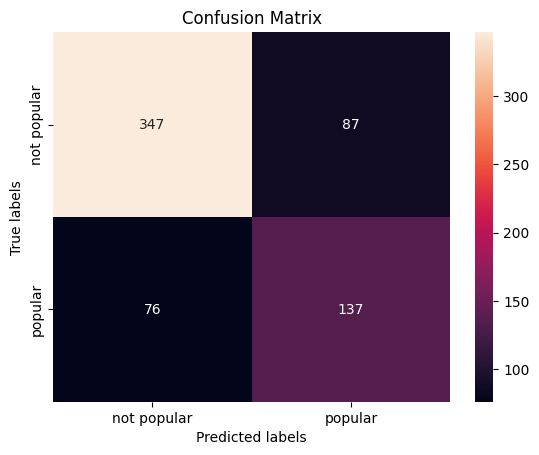

In [16]:
best_estimator(rf, param_grid_rf)

Random Forest Classifier gives >84% accuracy and approximately 75% prediction accuracy